In [9]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [10]:
# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv')
df.shape
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [11]:
# Convert Diagnosis to 0 and 1.
df.loc[df['Tumor_Type'] == 'Benign', 'Tumor_Type'] = 0
df.loc[df['Tumor_Type'] == 'Malignant', 'Tumor_Type'] = 1
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,1,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,0,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,0,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,1,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,0,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,1,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,0,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,0,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,1,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [12]:
# Store relevant columns as variables
X = df[['Tumor_Size']].values.reshape(-1, 1)
y = df[['Survival_Rate']].values.reshape(-1, 1).astype(int)

Text(0, 0.5, 'Survival Rate')

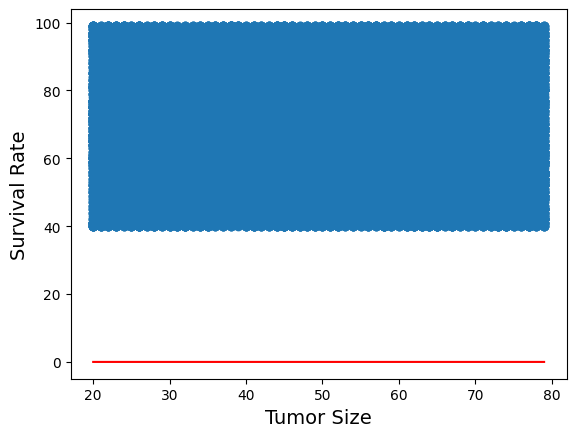

In [18]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y))

# Graph logistic regression probabilities
plt.scatter(X, y)
xDelta = np.linspace(X.min(), X.max(), 10) # use to draw the plot
yPredicted = logisticModel.predict(X).reshape(-1, 1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1, 1))[:, 1] # Predict the probability for xDelta
plt.plot(xDelta, yDeltaProb, color='red')
plt.xlabel('Tumor Size', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)